In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Online retail1.csv',header=None)

In [12]:
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [14]:
df1=pd.DataFrame(pd.read_csv('Online retail1.csv',names=[i for i in range(20)]))
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"shrimp,almonds,avocado,vegetables mix,green gr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"burgers,meatballs,eggs",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"turkey,avocado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"mineral water,milk,energy bar,whole wheat rice...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,"butter,light mayo,fresh bread",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,"burgers,frozen vegetables,eggs,french fries,ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,"escalope,green tea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df1.isnull().sum()

0        0
1     7501
2     7501
3     7501
4     7501
5     7501
6     7501
7     7501
8     7501
9     7501
10    7501
11    7501
12    7501
13    7501
14    7501
15    7501
16    7501
17    7501
18    7501
19    7501
dtype: int64

In [19]:
df1.duplicated

<bound method DataFrame.duplicated of                                                      0   1   2   3   4   5   \
0     shrimp,almonds,avocado,vegetables mix,green gr... NaN NaN NaN NaN NaN   
1                                burgers,meatballs,eggs NaN NaN NaN NaN NaN   
2                                               chutney NaN NaN NaN NaN NaN   
3                                        turkey,avocado NaN NaN NaN NaN NaN   
4     mineral water,milk,energy bar,whole wheat rice... NaN NaN NaN NaN NaN   
...                                                 ...  ..  ..  ..  ..  ..   
7496                      butter,light mayo,fresh bread NaN NaN NaN NaN NaN   
7497  burgers,frozen vegetables,eggs,french fries,ma... NaN NaN NaN NaN NaN   
7498                                            chicken NaN NaN NaN NaN NaN   
7499                                 escalope,green tea NaN NaN NaN NaN NaN   
7500    eggs,frozen smoothie,yogurt cake,low fat yogurt NaN NaN NaN NaN NaN   

      6   7  

In [21]:
basket_items=[]
for index,row in df.iterrows():
    cleansed_items= [item for item in row if str(item)!='nan']
    basket_items.append(cleansed_items)
basket_items[:3]    

[['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'],
 ['burgers,meatballs,eggs'],
 ['chutney']]

In [22]:
transaction=[]
for i in df.itertuples():
    l=set(list(i))
    transaction.append([i for i in l if(str(i)!='nan' and type(i)!=int)])

In [23]:
transaction

[['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'],
 ['burgers,meatballs,eggs'],
 ['chutney'],
 ['turkey,avocado'],
 ['mineral water,milk,energy bar,whole wheat rice,green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta,french fries'],
 ['soup,light cream,shallot'],
 ['frozen vegetables,spaghetti,green tea'],
 ['french fries'],
 ['eggs,pet food'],
 ['cookies'],
 ['turkey,burgers,mineral water,eggs,cooking oil'],
 ['spaghetti,champagne,cookies'],
 ['mineral water,salmon'],
 ['mineral water'],
 ['shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt'],
 ['turkey,eggs'],
 ['turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate'],
 ['meatballs,milk,honey,french fries,protein bar'],
 ['red wine,shrimp,pasta,pepper,eggs,chocolate,shampoo'],
 ['rice,sparkling wa

In [24]:
len(transaction)

7501

In [29]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth

In [31]:
t=TransactionEncoder()
t_arr=t.fit_transform(transaction)

In [32]:
data=pd.DataFrame(t_arr,columns=t.columns_)
data

,almonds,"almonds,cake,low fat yogurt","almonds,cookies","almonds,eggs","almonds,eggs,cookies","almonds,eggs,cooking oil,french fries,green tea","almonds,eggs,yogurt cake","almonds,french wine","almonds,french wine,green tea,french fries,escalope,strawberries,tomato juice,honey","almonds,pancakes,eggs,chocolate,french fries,mint",...,"yams,mineral water,energy bar,eggs,fresh bread","yams,mineral water,french fries","yams,mineral water,soup,milk,pancakes,whole wheat rice,barbecue sauce,carrots,chocolate,champagne","yams,mint",yogurt cake,"yogurt cake,candy bars","yogurt cake,energy drink","yogurt cake,honey","yogurt cake,low fat yogurt","yogurt cake,mint"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
item_count={}
for col in data.columns:
    item_count[col]= data[col].sum()
item_freq_df= pd.DataFrame(data=list(item_count.values()),index=list(item_count.keys()),columns=['frequency']).sort_values(by='frequency', ascending=False)  
item_freq_df.shape, item_freq_df.head(10)    

((5176, 1),
                 frequency
 cookies               223
 french fries          132
 escalope              101
 mineral water          93
 eggs                   90
 chocolate              73
 green tea              72
 spaghetti              52
 champagne              45
 low fat yogurt         45)

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250')])

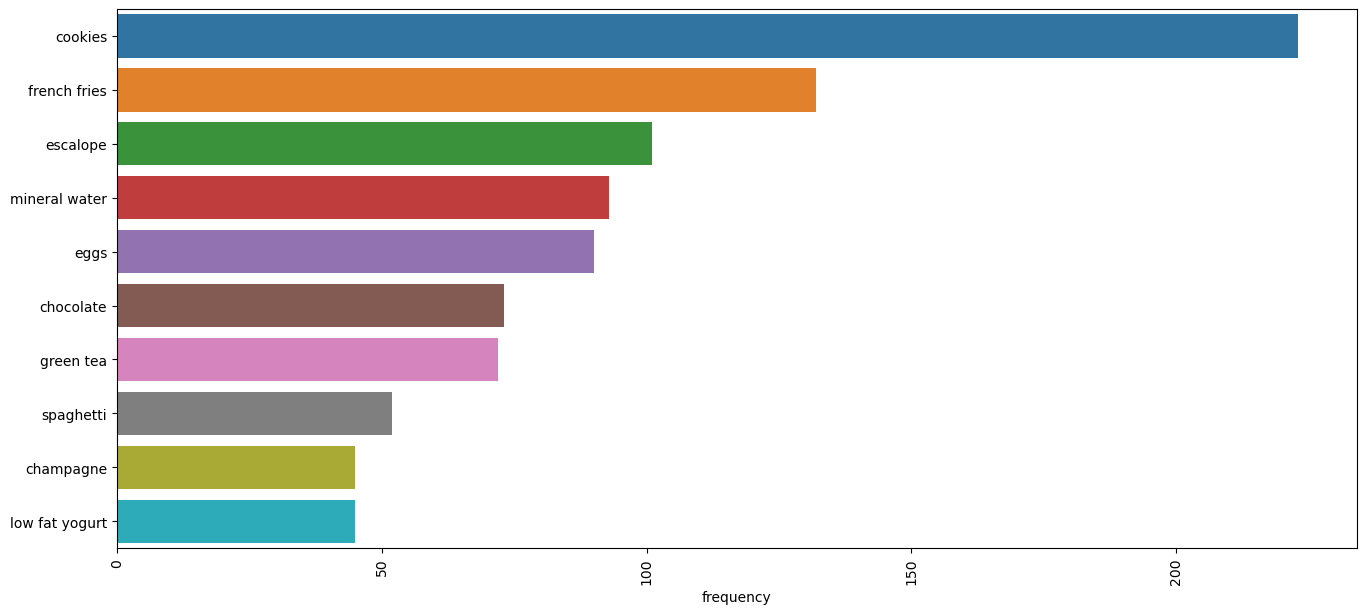

In [37]:
plt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df.frequency[:10])
plt.xticks(rotation=90)

In [38]:
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

freq>200: 1 items
freq>100: 3 items
freq>50: 8 items


In [39]:
res=fpgrowth(data, min_support=0.01, use_colnames=True)
pd.set_option('display.max_rows', 15)
res

,support,itemsets
0,0.017598,(french fries)
1,0.029729,(cookies)
2,0.012398,(mineral water)
3,0.011998,(eggs)
4,0.013465,(escalope)


In [40]:
res=association_rules(res,metric='confidence', min_threshold=0.02)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [41]:
res.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [42]:
res.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
